# Gini Impurity
基尼不純度（Gini Impurity）是一種衡量資料集中不同分類混合程度的指標，主要用於決策樹中，幫助選擇最佳的分割方式。基尼不純度越低，表示該節點的分類越純（同類資料集中在一起）。
基尼不純度幫助衡量資料的分類效果。在決策樹中，通過每次分割降低基尼不純度，模型能逐步形成更準確的分類結果。
G = 1 - (Pa^2 + Pb^2)

# 資訊增益（Information Gain, IG）
是一種用來評估特徵分割效果的指標，在決策樹演算法中尤為重要。它量化了某個特徵分割後，資料的不確定性(熵，Entropy)降低了多少。資訊增益越高，代表該特徵對資料分類的效果越好。

In [1]:
## The usual libraries, loading the dataset and performing the train-test split
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## Functions to calculate gini impurity and information gain

def gini(data):
    """calculate the Gini Impurity
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)
   
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right branch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

#### -----------------------------------
## 1. Calculate sample sizes for a split on `persons_2`

left = y_train[x_train['persons_2']==0]
right = y_train[x_train['persons_2']==1]
len_left = len(left)
len_right = len(right)
print ('No. of cars with persons_2 == 0:', len_left)
print ('No. of cars with persons_2 == 1:', len_right)

## 2. Calculate gini impurities
gi = gini(y_train)
gini_left = gini(left)
gini_right = gini(right)

print('Left split gini impurity:', gini_left)
print('Right split gini impurity:', gini_right)

## 3.Information gain when using feature `persons_2`
info_gain_persons_2 = info_gain(left, right, gi)
print(f'Information gain for persons_2:', info_gain_persons_2)

## 4. Which feature split maximizes information gain?
info_gain_list = []
for i in x_train.columns:
    left = y_train[x_train[i]==0]
    right = y_train[x_train[i]==1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1,ascending=False)
print(info_gain_table.iloc[0,:][0])
print(f'Greatest impurity gain at:{info_gain_table.iloc[0,:]}')
print(info_gain_table)

No. of cars with persons_2 == 0: 917
No. of cars with persons_2 == 1: 465
Left split gini impurity: 0.49485722848081015
Right split gini impurity: 0.0
Information gain for persons_2: 0.09013468781461476
safety_low
Greatest impurity gain at:0    safety_low
1      0.091603
Name: 19, dtype: object
                 0         1
19      safety_low  0.091603
12       persons_2  0.090135
18     safety_high  0.045116
14    persons_more  0.025261
13       persons_4  0.020254
7      maint_vhigh  0.013622
3     buying_vhigh  0.011001
20      safety_med  0.008480
17  lug_boot_small  0.006758
1       buying_low  0.006519
5        maint_low  0.005343
6        maint_med  0.004197
15    lug_boot_big  0.003913
2       buying_med  0.003338
8          doors_2  0.002021
0      buying_high  0.001094
4       maint_high  0.000530
10         doors_4  0.000423
16    lug_boot_med  0.000386
11     doors_5more  0.000325
9          doors_3  0.000036


# Decision Trees (Train and Predict using scikit-learn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

## 1. Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(dtree.get_params())
print(f'Decision Tree parameters: {None}')

## 2. Fit decision tree on training set and print the depth of the tree
dtree.fit(x_train, y_train)
print(dtree.get_depth())
print(f'Decision tree depth: {None}')

## 3. Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)
print(f'Test set accuracy: {dtree.score(x_test, y_test)}') 
 # or accuracy_score(y_test, y_pred)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision Tree parameters: None
11
Decision tree depth: None
Test set accuracy: 0.9797687861271677


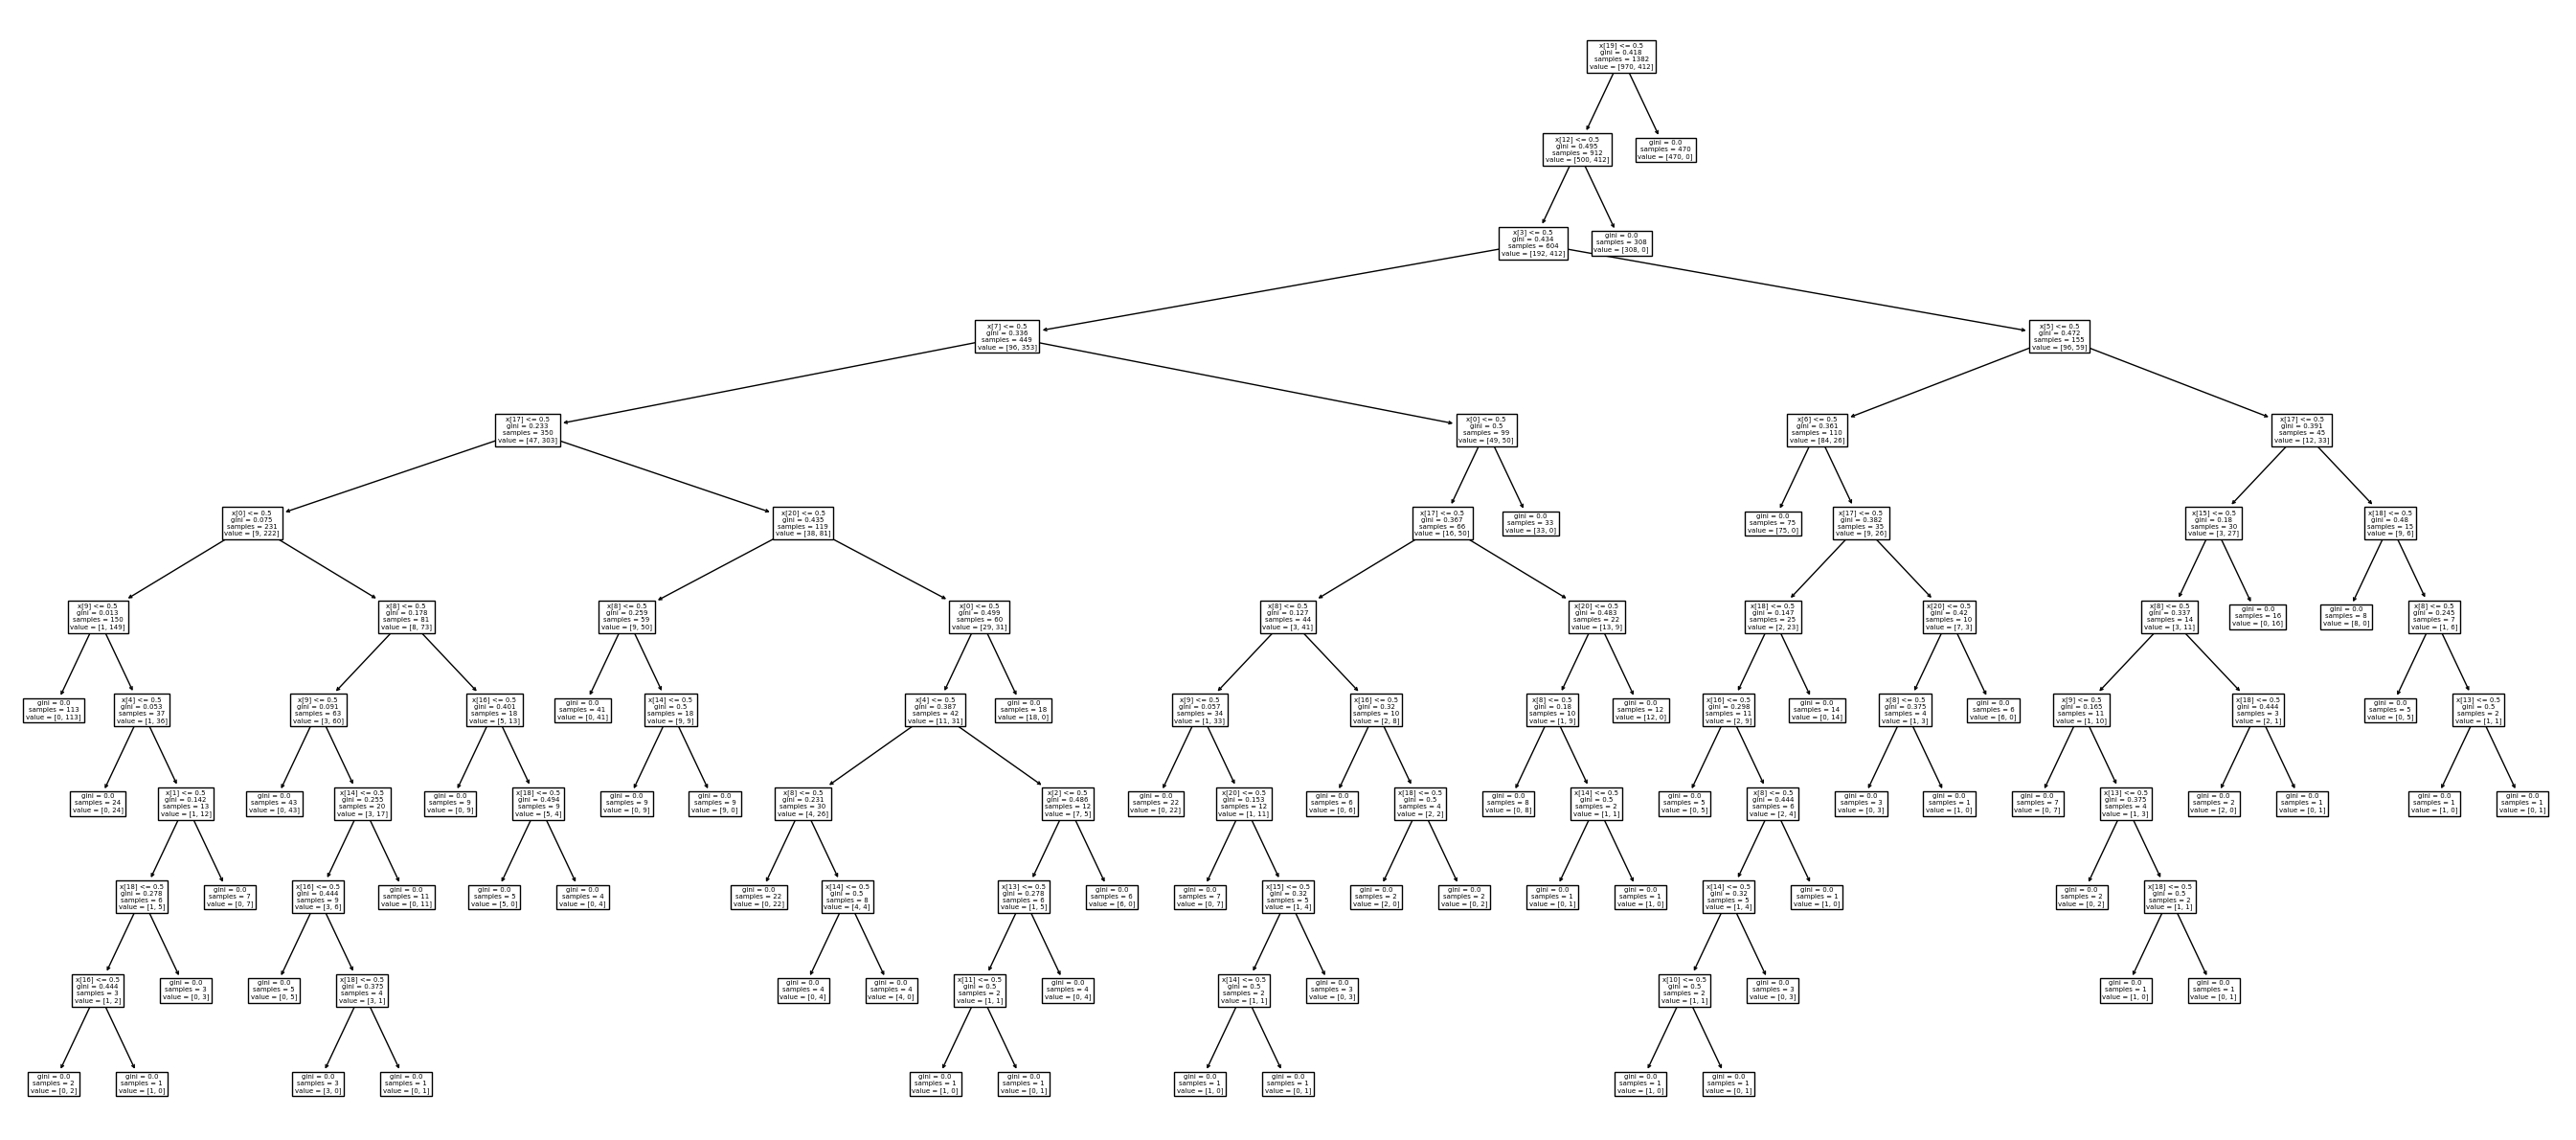

In [3]:
## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree)
plt.tight_layout()
plt.show()

In [4]:
## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree))

|--- feature_19 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   | 